#  Data Modelling

##  Heart disease predictor

This notebook actually looks upto the python based machine learning and data science libraries in an attempt to build a ML model capable of predicting if the person has heart disease or not with the data

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

###  Problem definition
> we need to predict if the person has heart disease or not


###  Data

In [1]:
# regular EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# MODEL from scikit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# for evaluation as this is a classification one
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import RocCurveDisplay


In [2]:
heart = pd.read_csv("c://users//shrey//downloads//csv//heart-disease.csv")

In [3]:
df = heart
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Check for the empty or NAN 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Checking out the datatypes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

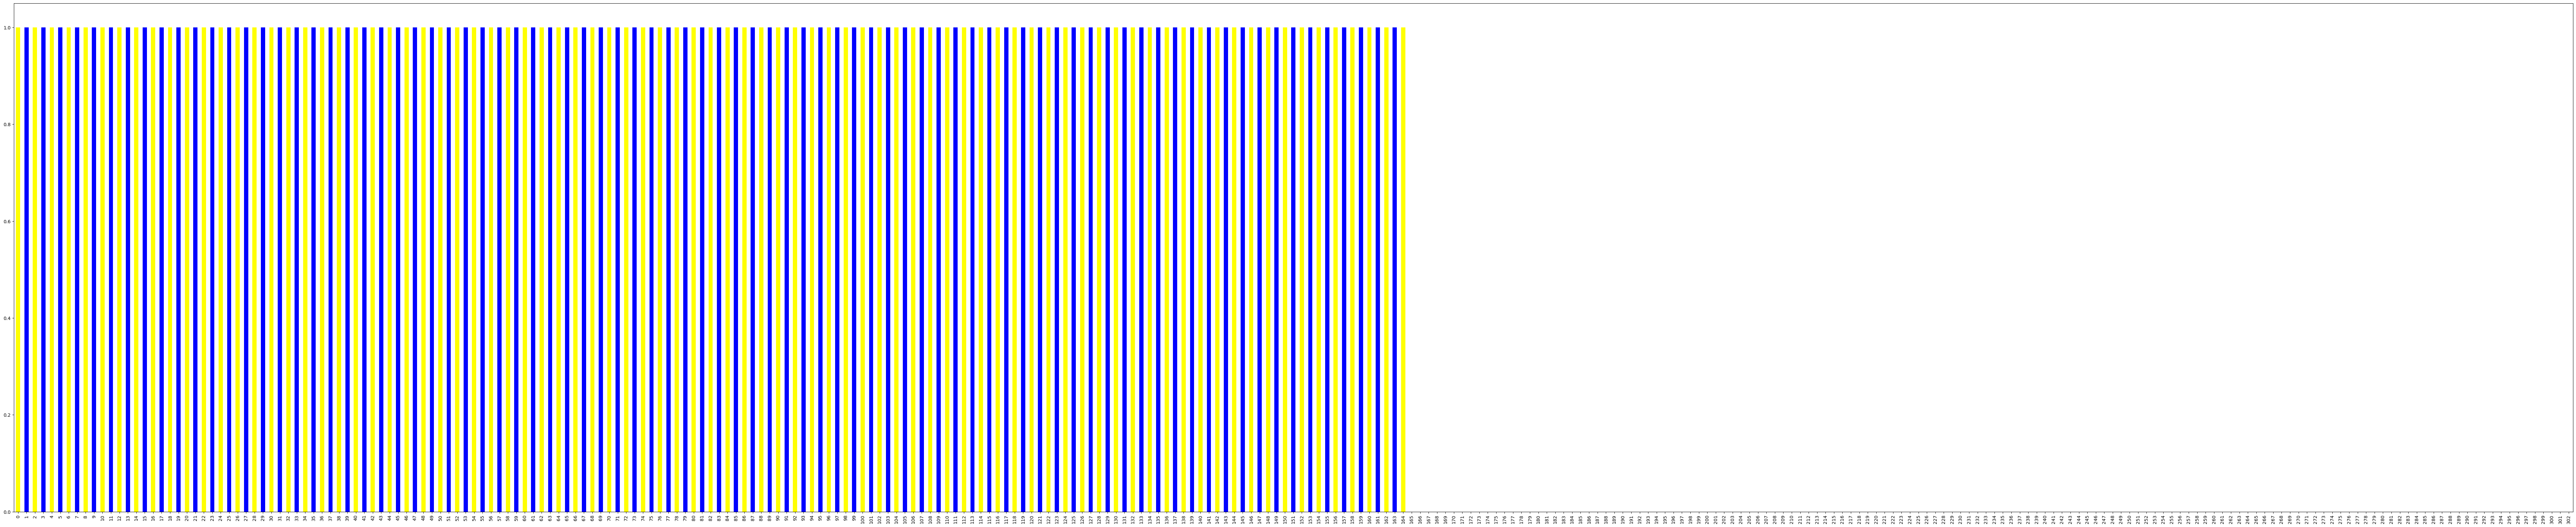

In [6]:
df.target.plot(kind = "bar", color = ["Yellow","blue"],figsize = (100,20));

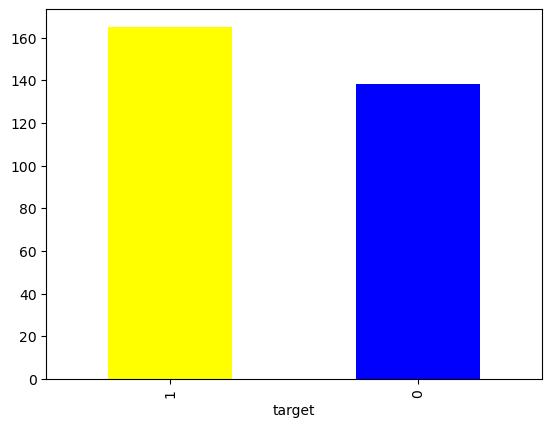

In [7]:
df.target.value_counts().plot(kind = "bar", color = ["Yellow","blue"]);

In [8]:
# the data isnt tooo much one sided 

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
 # Patterns :- lets start comparing columns

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

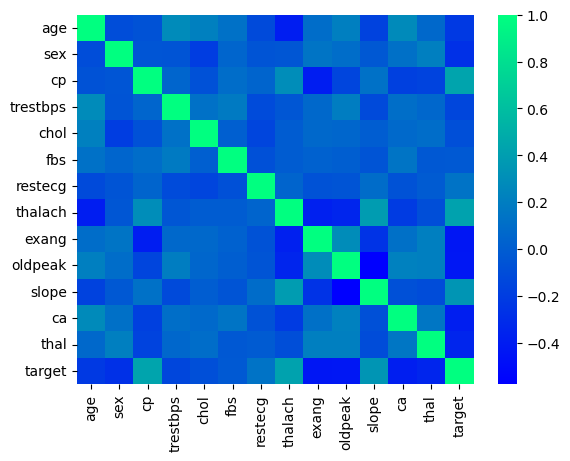

In [12]:
sns.heatmap(data = df.corr(),cmap = "winter")

In [13]:
# Compare the target columns with other columns
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
# The rate of men and woman is soooo varying the correlation must be high
df.target.corr(df.sex)

-0.28093657550176654

In [15]:
df.target.std()

0.4988347841643926

In [16]:
# WHY NOT CHANGE MEN AND WOMAN INTO DIFF DATASETS MMM?

<Axes: xlabel='target'>

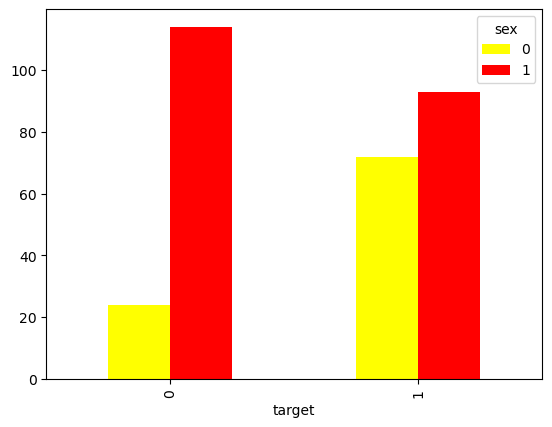

In [17]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",color = ["yellow","red"])

In [18]:
df.thalach # MAX HEART RATE ACHIEVED

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

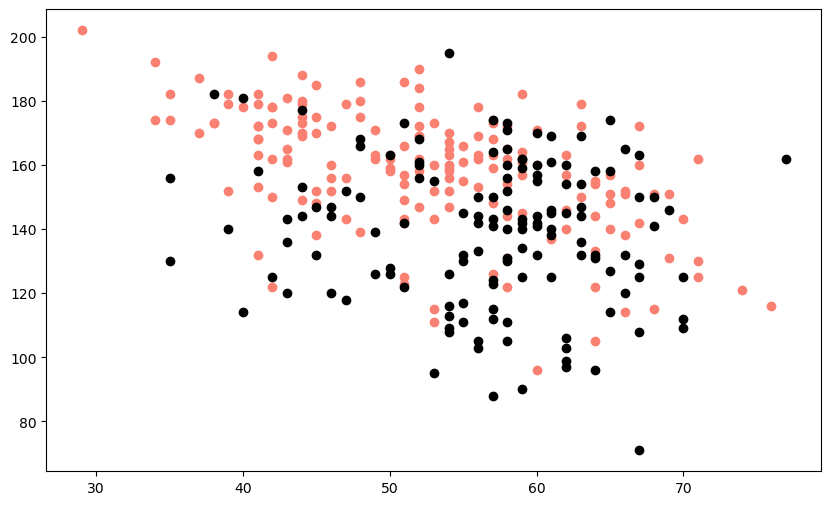

In [19]:
plt.figure(figsize = (10,6))
plt.scatter(df.age[df.target ==1],
           df.thalach[df.target==1],
           c = "salmon") 
plt.scatter(df.age[df.target ==0],
           df.thalach[df.target==0],
           c = "black") 

<Axes: ylabel='Frequency'>

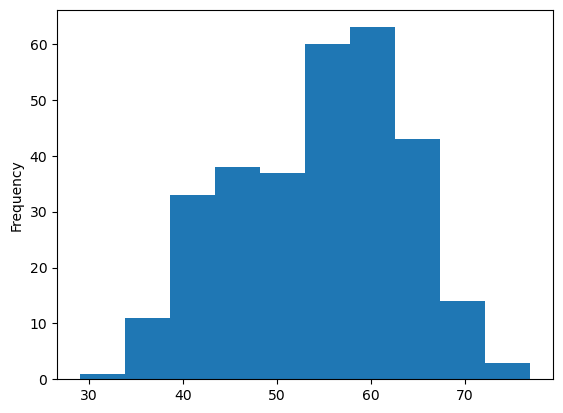

In [20]:
# Check the distribution of age 
df.age.plot.hist()

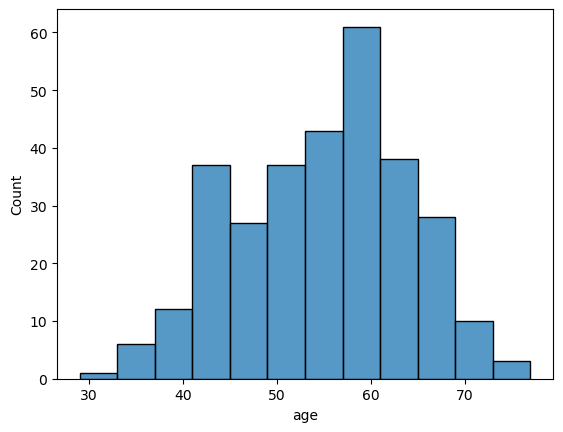

In [21]:
sns.histplot(df.age);

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


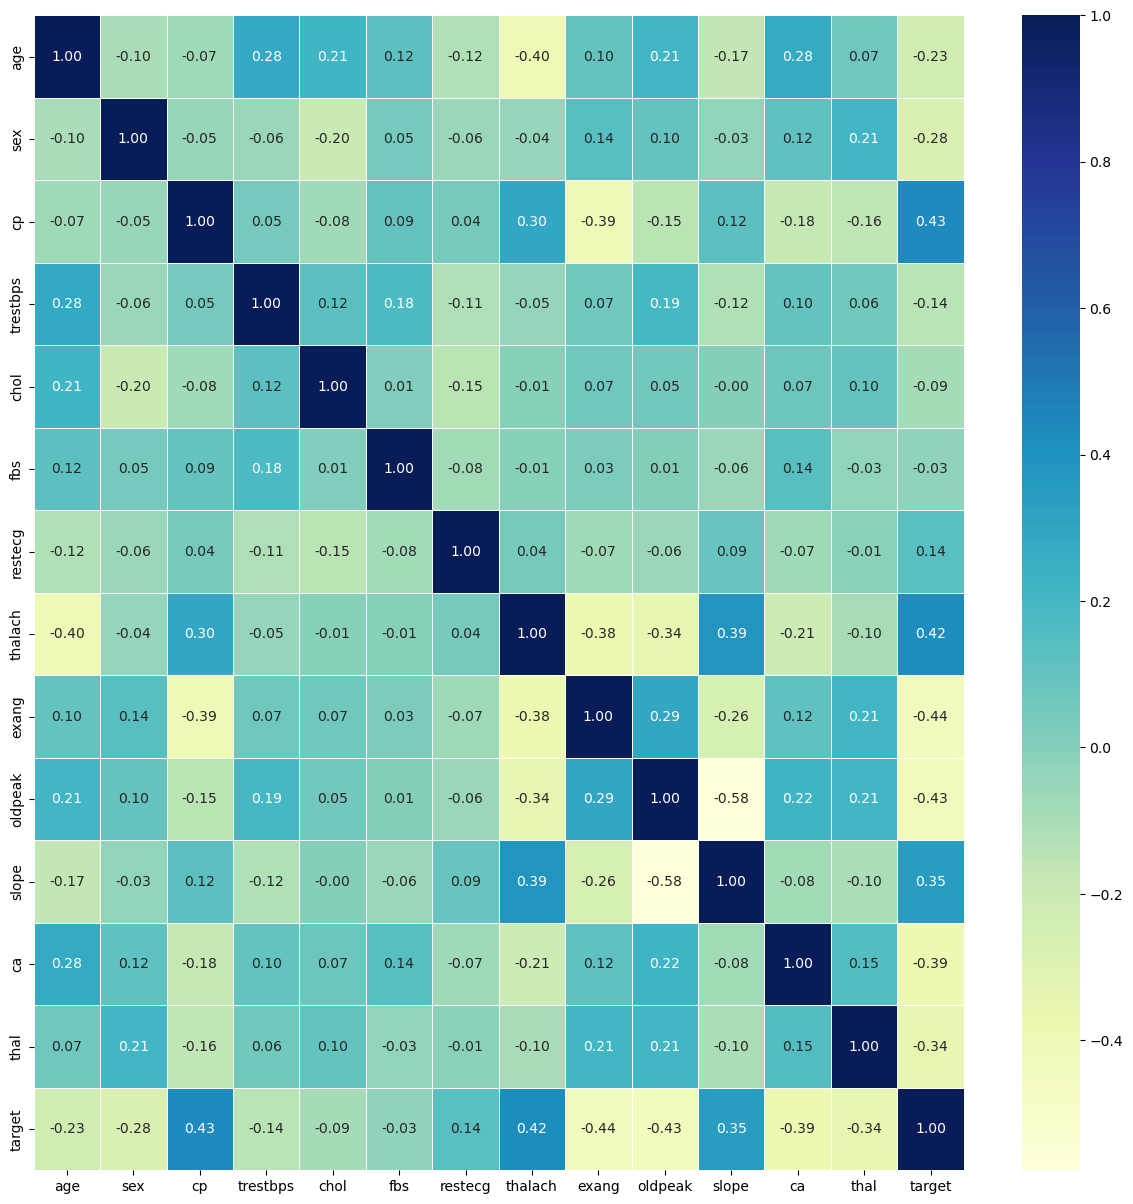

In [23]:
# co relation matrix
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt = '.2f',
                cmap = 'YlGnBu') 

### Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
np.random.seed(42)
x = df.drop("target",axis = 1)
y = df.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


##### 
1.Logistic regression
2.KN Classification
3.Randomforestclassification

In [27]:
models = {"Logistic regression":LogisticRegression(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "RandomForestClassifier":RandomForestClassifier()}

In [28]:
def fit_models(x_train,x_test,y_train,y_test):
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores    

In [29]:
model_scores = fit_models(x_train,x_test,y_train,y_test)
model_scores

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8524590163934426}

<Axes: >

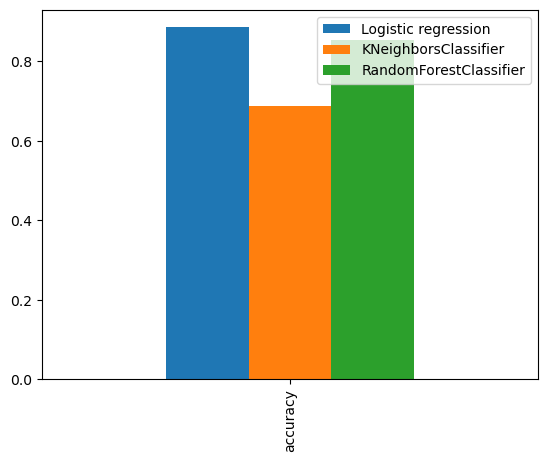

In [30]:
comparision = pd.DataFrame(model_scores,index = ["accuracy"])
comparision.plot(kind = "bar")

In [31]:
reg = LogisticRegression(max_iter = 10000)
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.8852459016393442

In [32]:
y_preds = reg.predict(x_test)


In [33]:
recall_score(y_test,y_preds)

0.90625

In [34]:
f1_score(y_test,y_preds)

0.8923076923076922

In [35]:
precision_score(y_test,y_preds)

0.8787878787878788

####  HYPERPARAMETER SETTING

In [36]:
train_scores = []
test_scores = []

# for n neighbours first
neighbours = range(1,21)
knn = KNeighborsClassifier()
for i in neighbours:
    knn.set_params(n_neighbors =i )
    knn.fit(x_train,y_train)
    test_scores.append(knn.score(x_test,y_test))
    train_scores.append(knn.score(x_train,y_train))
    

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [38]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

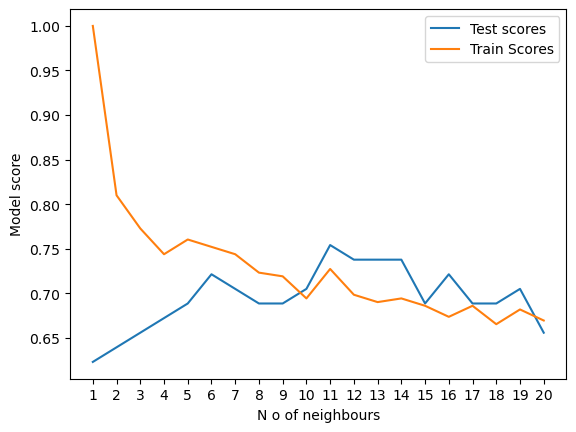

In [39]:
plt.plot(neighbours,test_scores,label = "Test scores")
plt.plot(neighbours,train_scores,label= "Train Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("N o of neighbours")
plt.ylabel("Model score")
plt.legend()


In [40]:
## Hyper paramteers tuning using randomised search cv

log_rig_grid = {"C": np.logspace(-4,4,20),
               "solver":["liblinear"]}
rand_class_grid = {"n_estimators":np.arange(10,1000,20),
                  "max_depth" :[None,3,5,10],
                  "min_samples_split":np.arange(2,20,4),
                   "min_samples_leaf":np.arange(1,20,3)}

In [41]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_rig_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True,
                               )
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [44]:
# for randomforest now


In [ ]:
np.random.seed(42)
rf = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions= rand_class_grid,
                       verbose = True,
                       cv = 5,
                       n_iter=20)
rf.fit(x_train,y_train)

In [46]:
rf.best_params_

{'n_estimators': 530,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [47]:
rf.score(x_test,y_test)

0.8688524590163934

In [48]:
model_scores

{'Logistic regression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8524590163934426}

In [49]:
# now lets try gird search cv hahaha lol 

In [50]:
gs_log = GridSearchCV(LogisticRegression(),param_grid=log_rig_grid ,
                 cv = 5,
                     verbose = True)

In [51]:
gs_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [52]:
gs_log.score(x_test,y_test)

0.8852459016393442

In [53]:
gs_ran = GridSearchCV(RandomForestClassifier(),
                      param_grid=rand_class_grid,
                      cv = 5,
                     verbose = True)

In [54]:
# gs_ran.fit(x_train,y_train)
# takes 35k fits thats a lot o time haha

###  Evaluation

In [55]:
y_preds = reg.predict(x_test)

In [57]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

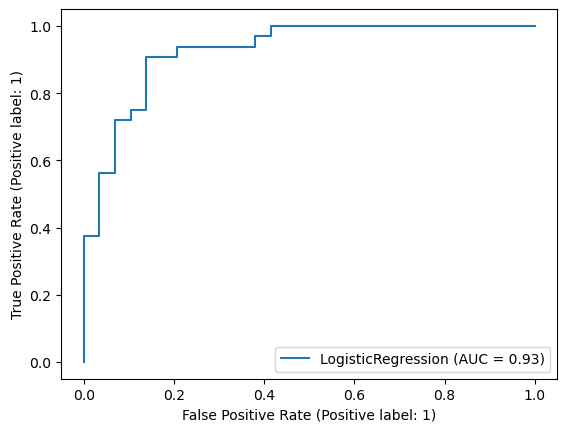

In [80]:
RocCurveDisplay.from_estimator(reg,x_test,y_test)
plt.show()

In [81]:
# confusionmatriix

In [82]:
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

<Axes: >

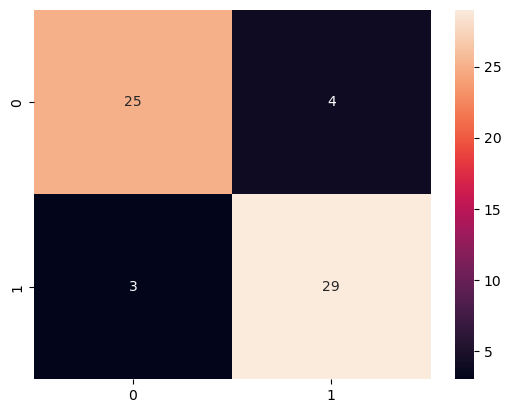

In [83]:
sns.heatmap(confusion_matrix(y_test,y_preds),annot = True)

In [84]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



###  Cross val for other accuracy measuring parameters 


In [87]:
cv_acc = cross_val_score(reg,x,y,cv = 10,scoring = "accuracy")
cv_acc.mean()

0.8182795698924732

In [88]:
cv_prec = cross_val_score(reg,x,y,cv = 10,scoring = "precision")
cv_prec.mean()

0.8113248361545576

In [89]:
cv_f1 = cross_val_score(reg,x,y,cv = 10,scoring = "f1")
cv_f1.mean()

0.8373478188493667

In [90]:
cv_recall = cross_val_score(reg,x,y,cv = 10,scoring = "recall")
cv_recall.mean()

0.8772058823529412

<Axes: >

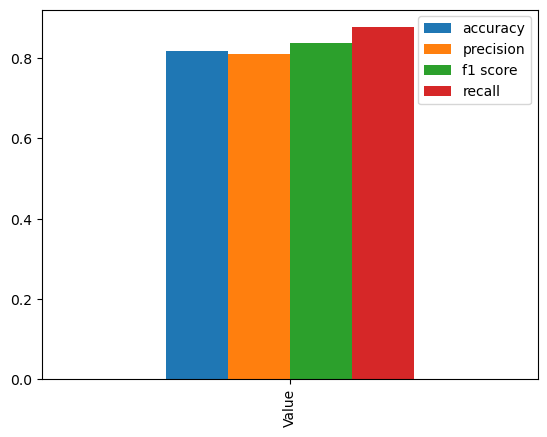

In [100]:
cv_metrics = pd.DataFrame({"accuracy":cv_acc.mean(),
                          "precision":cv_prec.mean(),
                          "f1 score":cv_f1.mean(),
                          "recall":cv_recall.mean()},index = ["Value"])
cv_metrics.plot.bar()

In [101]:
cv_metrics

,accuracy,precision,f1 score,recall
Value,0.81828,0.811325,0.837348,0.877206


### Feature importance

In [102]:
# which feature comntributed more to the outcomes

In [106]:
df.columns.view

<bound method Index.view of Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')>

In [108]:
reg.coef_

array([[-0.0070403 , -1.41004681,  0.79146338, -0.01594835, -0.00293344,
         0.16456993,  0.47843697,  0.01884699, -0.94936618, -0.64486049,
         0.62981006, -0.77677135, -0.91589183]])

In [121]:
d = dict(zip(df.columns,list(reg.coef_[0])))


{'age': -0.0070403022238981336,
 'sex': -1.410046807733022,
 'cp': 0.7914633824384633,
 'trestbps': -0.01594835284950437,
 'chol': -0.0029334374261684505,
 'fbs': 0.16456993246820592,
 'restecg': 0.4784369724371368,
 'thalach': 0.018846993822782297,
 'exang': -0.9493661756209438,
 'oldpeak': -0.6448604920772308,
 'slope': 0.6298100553275061,
 'ca': -0.7767713536070308,
 'thal': -0.9158918314132641}

In [125]:
feature = pd.DataFrame(d,index = [0])

<Axes: >

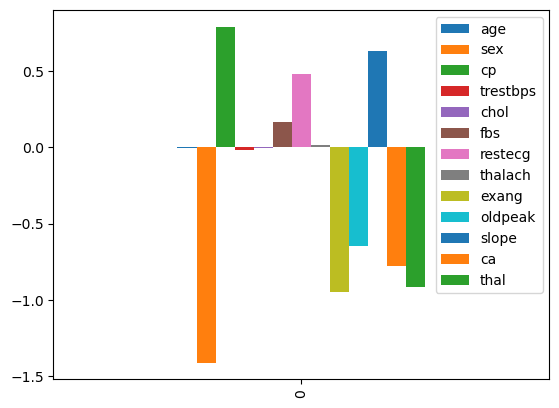

In [128]:
feature.plot.bar()

# Thats all for the model